In [7]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
M = 2
K = 3
n = 100
N = n * k

In [18]:
X1 = np.random.randn(n ,M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1,0,0] for i in range(n)])
Y2 = np.array([[0,1,0] for i in range(n)])
Y3 = np.array([[0,0,1] for i in range(n)])

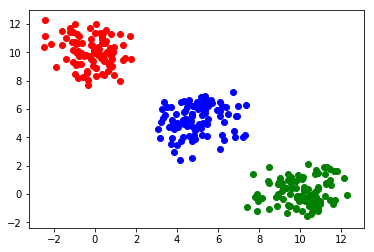

In [19]:
plt.scatter(X1[:, 0], X1[:, 1], color='red')
plt.scatter(X2[:, 0], X2[:, 1], color='blue')
plt.scatter(X3[:, 0], X3[:, 1], color='green')

In [20]:
X = np.concatenate((X1,X2,X3), axis=0)
Y = np.concatenate((Y1,Y2,Y3), axis=0)

In [22]:
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [23]:
cross_entropy = tf.reduce_mean(
    -tf.reduce_sum(t * tf.log(y), reduction_indices=[1])
)

In [24]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [25]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [28]:
batch_size = 50
n_batches = N // batch_size

In [30]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [31]:
for epoch in range(20):
    X_, Y_ = shuffle(X, Y)
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })

In [40]:
X_, Y_ = shuffle(X, Y)
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X_[0:10], t: Y_[0:10]
})
print(classified)
prob = y.eval(session=sess, feed_dict={
    x: X_[0:10],
    t: Y_[0:10]
})
print(prob)

[ True  True  True  True  True  True  True  True  True  True]
[[  9.86506045e-01   1.34939272e-02   9.10421782e-09]
 [  1.26830244e-08   4.45338227e-02   9.55466151e-01]
 [  9.96430874e-01   3.56905512e-03   3.35898065e-09]
 [  6.14885800e-03   9.79348302e-01   1.45027824e-02]
 [  1.49435597e-03   9.76389468e-01   2.21161637e-02]
 [  9.98364389e-01   1.63560989e-03   4.78224016e-10]
 [  9.92424846e-01   7.57512217e-03   7.16599446e-09]
 [  1.71646830e-02   9.78141069e-01   4.69425507e-03]
 [  2.18059886e-02   9.71793294e-01   6.40081102e-03]
 [  5.39025491e-10   2.33492814e-03   9.97665048e-01]]


In [42]:
print(sess.run(W))
print(sess.run(b))

[[-1.10635722  0.297977    0.80838013]
 [ 0.76953012  0.28816876 -1.05769944]]
